In [570]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [571]:
df = pd.read_csv("Train_Data.csv")
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,neptune
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,normal
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,normal
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,neptune


In [572]:
df.shape
df['attack'].value_counts()

attack
normal     53847
neptune    32998
Name: count, dtype: int64

In [573]:
df.shape

(86845, 43)

In [574]:
df.dtypes

duration                    int64
protocoltype               object
service                    object
flag                       object
srcbytes                    int64
dstbytes                    int64
land                        int64
wrongfragment               int64
urgent                      int64
hot                         int64
numfailedlogins             int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numroot                     int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
numoutboundcmds             int64
ishostlogin                 int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
srvserrorrate             float64
rerrorrate                float64
srvrerrorrate             float64
samesrvrate               float64
diffsrvrate   

In [575]:

df.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
land                      0
wrongfragment             0
urgent                    0
hot                       0
numfailedlogins           0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
numoutboundcmds           0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportra

In [576]:
## visualization of data
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

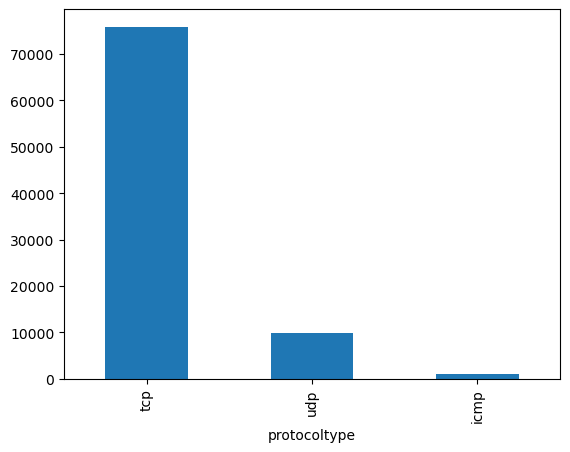

In [577]:
bar_graph('protocoltype')

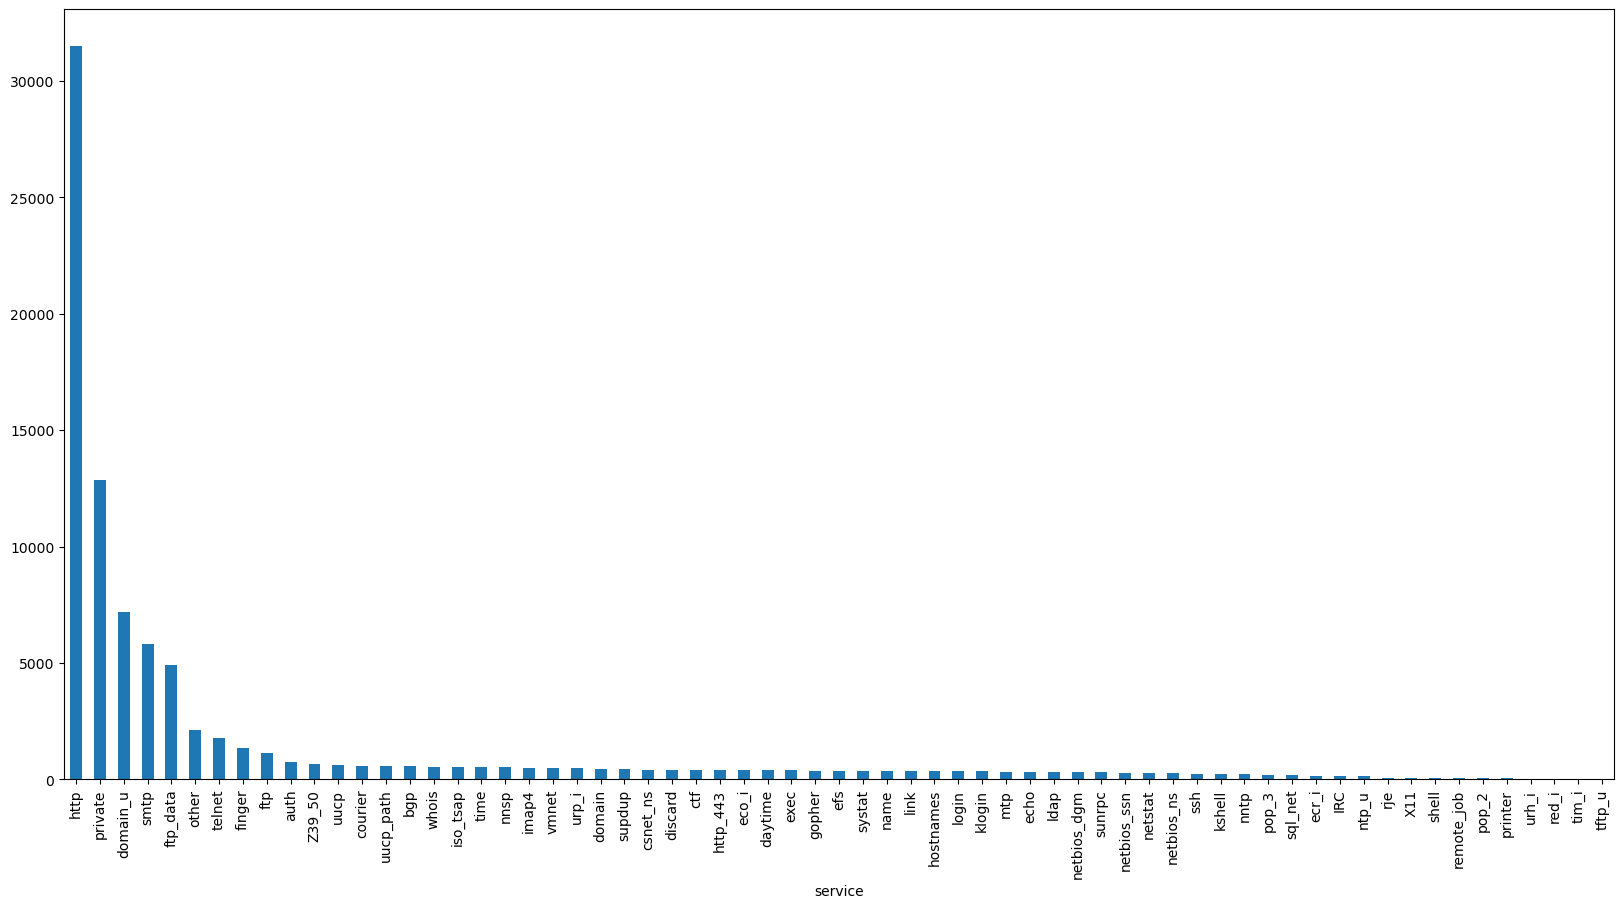

In [578]:
plt.figure(figsize=(20,10))
bar_graph('service')

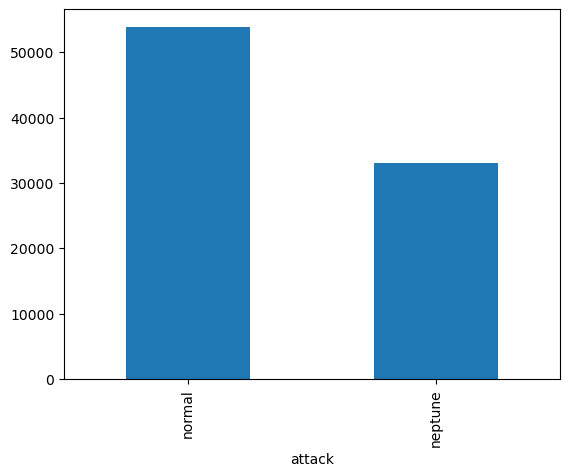

In [579]:
bar_graph('attack')

In [580]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag', 'attack'],
      dtype='object')

In [581]:
import pandas as pd 

In [582]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('numroot',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srvserrorrate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srvrerrorrate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dsthostsrvserrorrate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dsthostserrorrate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dsthostrerrorrate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dsthostsrvrerrorrate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dsthostsamesrvrate',axis = 1, inplace=True)

In [583]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.05,0.06,0.00,255,15,0.06,0.00,0.00,21,neptune
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,1.00,0.00,0.00,255,116,0.04,0.00,0.00,18,normal
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.08,57,255,0.00,0.02,0.03,21,normal
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,255,255,0.00,0.00,0.00,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.06,0.00,255,3,0.08,0.00,0.00,19,neptune


In [584]:
df.shape

(86845, 35)

In [585]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numfilecreations',
       'numshells', 'numaccessfiles', 'numoutboundcmds', 'ishostlogin',
       'isguestlogin', 'count', 'srvcount', 'serrorrate', 'rerrorrate',
       'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount',
       'dsthostsrvcount', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'lastflag', 'attack'],
      dtype='object')

In [586]:
## feature mapping 

#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocoltype'] = df['protocoltype'].map(pmap)

#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

amap = {'normal':0,'neptune':1}
df['attack'] = df['attack'].map(amap)

In [587]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,attack
0,0,1,netbios_dgm,2,0,0,0,0,0,0,...,0.05,0.06,0.00,255,15,0.06,0.00,0.00,21,1
1,0,1,smtp,0,1239,400,0,0,0,0,...,1.00,0.00,0.00,255,116,0.04,0.00,0.00,18,0
2,0,1,http,0,222,945,0,0,0,0,...,1.00,0.00,0.08,57,255,0.00,0.02,0.03,21,0
3,0,1,http,0,235,1380,0,0,0,0,...,1.00,0.00,0.00,255,255,0.00,0.00,0.00,21,0
4,0,1,uucp_path,2,0,0,0,0,0,0,...,0.01,0.06,0.00,255,3,0.08,0.00,0.00,19,1


In [588]:
df.drop('service',axis = 1,inplace= True)

In [589]:
df.head()

,duration,protocoltype,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,...,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag,attack
0,0,1,2,0,0,0,0,0,0,0,...,0.05,0.06,0.00,255,15,0.06,0.00,0.00,21,1
1,0,1,0,1239,400,0,0,0,0,0,...,1.00,0.00,0.00,255,116,0.04,0.00,0.00,18,0
2,0,1,0,222,945,0,0,0,0,0,...,1.00,0.00,0.08,57,255,0.00,0.02,0.03,21,0
3,0,1,0,235,1380,0,0,0,0,0,...,1.00,0.00,0.00,255,255,0.00,0.00,0.00,21,0
4,0,1,2,0,0,0,0,0,0,0,...,0.01,0.06,0.00,255,3,0.08,0.00,0.00,19,1


In [590]:
df.dtypes

duration                    int64
protocoltype                int64
flag                        int64
srcbytes                    int64
dstbytes                    int64
land                        int64
wrongfragment               int64
urgent                      int64
hot                         int64
numfailedlogins             int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
numoutboundcmds             int64
ishostlogin                 int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
rerrorrate                float64
samesrvrate               float64
diffsrvrate               float64
srvdiffhostrate           float64
dsthostcount                int64
dsthostsrvcount             int64
dsthostdiffsrv

In [591]:
### lets create a model 

In [592]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [593]:
# Target variable and train set
y = df[['attack']]
X = df.drop(['attack',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(85976, 33) (869, 33)
(85976, 1) (869, 1)


In [594]:
### lets create a model 

In [595]:
from sklearn.ensemble import RandomForestClassifier

In [596]:
model1 = RandomForestClassifier(n_estimators=30)

In [597]:
start_time = time.time()
model1.fit(X_train, y_train.values.ravel())
end_time = time.time()


In [598]:
print("Training time: ",end_time-start_time)

Training time:  1.971024513244629


In [599]:
print("Train score is:", model1.score(X_train, y_train))
print("Test score is:",model1.score(X_test,y_test))

Train score is: 1.0
Test score is: 1.0


In [600]:
preds = model1.predict(X_train)
preds

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [601]:
preds.shape

(85976,)

In [602]:
df_test = pd.read_csv("Test_Data.csv")

In [603]:
df_test.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,tcp,mtp,REJ,0,0,0,0,0,0,...,7,0.03,0.08,0.0,0.0,0.0,0.0,1.0,1.0,20
1,0,tcp,http,SF,199,1721,0,0,0,0,...,255,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,21
2,0,tcp,discard,S0,0,0,0,0,0,0,...,14,0.05,0.09,0.0,0.0,1.0,1.0,0.0,0.0,18
3,0,tcp,telnet,S0,0,0,0,0,0,0,...,2,0.01,0.09,0.0,0.0,1.0,1.0,0.0,0.0,18
4,0,tcp,exec,S0,0,0,0,0,0,0,...,16,0.06,0.06,0.0,0.0,1.0,1.0,0.0,0.0,20


In [604]:
df_test.shape

(21712, 42)

In [605]:
df_test.drop('numroot',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df_test.drop('srvserrorrate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df_test.drop('srvrerrorrate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df_test.drop('dsthostsrvserrorrate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df_test.drop('dsthostserrorrate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df_test.drop('dsthostrerrorrate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df_test.drop('dsthostsrvrerrorrate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df_test.drop('dsthostsamesrvrate',axis = 1, inplace=True)

In [606]:
## feature mapping 

#protocol_type feature mapping
pmap1 = {'icmp':0,'tcp':1,'udp':2}
df_test['protocoltype'] = df_test['protocoltype'].map(pmap1)

#flag feature mapping
fmap1 = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df_test['flag'] = df_test['flag'].map(fmap1)



In [607]:
df_test.shape


(21712, 34)

In [608]:
df_test.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag
0,0,1,mtp,2,0,0,0,0,0,0,...,1.0,0.03,0.07,0.0,255,7,0.08,0.0,0.0,20
1,0,1,http,0,199,1721,0,0,0,0,...,0.0,1.00,0.00,0.2,255,255,0.00,0.0,0.0,21
2,0,1,discard,1,0,0,0,0,0,0,...,0.0,0.38,0.38,0.0,255,14,0.09,0.0,0.0,18
3,0,1,telnet,1,0,0,0,0,0,0,...,0.0,0.03,0.05,0.0,255,2,0.09,0.0,0.0,18
4,0,1,exec,1,0,0,0,0,0,0,...,0.0,0.18,0.06,0.0,255,16,0.06,0.0,0.0,20


In [609]:
df_test.drop('service', axis=1,inplace=True)

In [610]:
df_test.shape

(21712, 33)

In [611]:
df_test.head()

,duration,protocoltype,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,...,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,lastflag
0,0,1,2,0,0,0,0,0,0,0,...,1.0,0.03,0.07,0.0,255,7,0.08,0.0,0.0,20
1,0,1,0,199,1721,0,0,0,0,0,...,0.0,1.00,0.00,0.2,255,255,0.00,0.0,0.0,21
2,0,1,1,0,0,0,0,0,0,0,...,0.0,0.38,0.38,0.0,255,14,0.09,0.0,0.0,18
3,0,1,1,0,0,0,0,0,0,0,...,0.0,0.03,0.05,0.0,255,2,0.09,0.0,0.0,18
4,0,1,1,0,0,0,0,0,0,0,...,0.0,0.18,0.06,0.0,255,16,0.06,0.0,0.0,20


In [612]:
X1 = df_test.columns

In [613]:
X1

Index(['duration', 'protocoltype', 'flag', 'srcbytes', 'dstbytes', 'land',
       'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numfilecreations',
       'numshells', 'numaccessfiles', 'numoutboundcmds', 'ishostlogin',
       'isguestlogin', 'count', 'srvcount', 'serrorrate', 'rerrorrate',
       'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount',
       'dsthostsrvcount', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'lastflag'],
      dtype='object')

In [614]:
df_test.dtypes

duration                    int64
protocoltype                int64
flag                        int64
srcbytes                    int64
dstbytes                    int64
land                        int64
wrongfragment               int64
urgent                      int64
hot                         int64
numfailedlogins             int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
numoutboundcmds             int64
ishostlogin                 int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
rerrorrate                float64
samesrvrate               float64
diffsrvrate               float64
srvdiffhostrate           float64
dsthostcount                int64
dsthostsrvcount             int64
dsthostdiffsrv

In [615]:
sc=MinMaxScaler()
X2=sc.fit_transform(df)

In [616]:
test_pred = model1.predict(df_test)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [617]:
test_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [618]:
test_pred.shape

(21712,)

In [619]:
df_s=pd.read_csv("Sample_Submission__.csv")


In [620]:
df_s.head()

,attack
0,0
1,0
2,0
3,1
4,1


In [621]:
df_s.shape

(21712, 1)

In [622]:
df_s["attack"]=test_pred

In [623]:
df_s.head()

,attack
0,1
1,0
2,1
3,1
4,1


In [624]:
df_s.tail()

,attack
21707,0
21708,0
21709,1
21710,0
21711,1


In [625]:
!pip upg

ERROR: unknown command "upg"



In [626]:
df_s.to_csv('submission.csv', index=False)

ImportError: cannot import name 'SequenceNotStr' from 'pandas._typing' (C:\Users\DELL\anaconda3\Lib\site-packages\pandas\_typing.py)

In [ ]:
dfs=pd.read_csv("submission.csv")